<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  3.6<br/>
<b>Packages:</b> networkx, python-louvain, demon, pquality, nf1 <br/>
<b>Last update:</b> 18/05/2018
</span>

<a id='top'></a>
# *Intro to Community Discovery*

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started.

In [4]:
import networkx as nx

In [5]:
g = nx.karate_club_graph()

In [6]:
from networkx.algorithms import community

# Community Discovery Algorithms

### A. Girvan-Newman

In [7]:
gn_hierarchy = community.girvan_newman(g)

In [8]:
[tuple(x) for x in next(gn_hierarchy)]

[(0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21),
 (32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31)]

In [9]:
[tuple(x) for x in next(gn_hierarchy)]

[(0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21),
 (32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31),
 (9,)]

In [10]:
[tuple(x) for x in next(gn_hierarchy)]

[(0, 1, 3, 7, 11, 12, 13, 17, 19, 21),
 (32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31),
 (4, 5, 6, 10, 16),
 (9,)]

In [11]:
[tuple(x) for x in next(gn_hierarchy)]

[(0, 1, 3, 7, 11, 12, 13, 17, 19, 21),
 (2, 24, 25, 27, 28, 31),
 (4, 5, 6, 10, 16),
 (32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30),
 (9,)]

### B. K-Cliques

In [12]:
kclique4 = list(community.k_clique_communities(g, 4))
kclique4 = [tuple(x) for x in kclique4]
kclique4

[(0, 1, 2, 3, 7, 13), (32, 33, 8, 30), (32, 33, 29, 23)]

In [13]:
kclique5 = list(community.k_clique_communities(g, 5))
kclique5 = [tuple(x) for x in kclique5]
kclique5

[(0, 1, 2, 3, 7, 13)]

### C. Louvain

In [ ]:
! pip install python-louvain

In [15]:
import community as louvain
from collections import defaultdict

In [16]:
coms = louvain.best_partition(g)
coms_to_node = defaultdict(list)
for n, c in coms.items():
    coms_to_node[c].append(n)

coms = [tuple(c) for c in coms_to_node.values()]
coms

[(0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21),
 (4, 5, 6, 10, 16),
 (8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33),
 (23, 24, 25, 27, 28, 31)]

### D. Label Propagation

In [17]:
lp = list(community.label_propagation_communities(g))
lp = [tuple(x) for x in lp]
lp

[(32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30),
 (16, 5, 6),
 (0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31)]

### E. Demon

In [ ]:
! pip install demon

In [19]:
import demon as dm
d = dm.Demon(graph=g, min_community_size=3,epsilon=0.5)
coms = d.execute()
coms

Exec: 100%|████████████████████████

Time:  'execute' 0.03 sec
------------------------------------


[(0, 4, 5, 6, 10, 16),
 (0, 1, 2, 3, 7, 8, 12, 13, 17, 19, 21, 30, 32, 33),
 (2, 8, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33)]

# 2. Evaluate partition quality

We will use the *pquality* package that implements the community quality functions described in:
```
Yang, Jaewon, and Jure Leskovec. 
"Defining and evaluating network communities based on ground-truth."  
Knowledge and Information Systems 42.1 (2015): 181-213.
```

In [ ]:
! pip install pquality

In [21]:
import pquality

In [22]:
results = pquality.pquality_summary(g, coms)
results['Indexes']

,min,max,avg,std
Index,,,,
Internal Density,0.068750,0.166667,0.109608,0.041583
Edges inside,10.000000,34.000000,25.666667,11.085526
Average Degree,3.333333,4.857143,4.105159,0.622251
FOMD,0.714286,0.937500,0.828373,0.091194
TPR,1.000000,1.000000,1.000000,0.000000
Expansion,1.000000,2.071429,1.690476,0.489110
Cut Ratio,0.055556,0.103571,0.076852,0.019974
Conductance,0.195122,0.375000,0.289697,0.073727
Normalized Cut,0.346065,0.546832,0.449660,0.082088


In [23]:
results['Modularity']

,value
Index,
Modularity (no overlap),0.146573


# 3. Compare partitions (NF1 score)

We will use the nf1 python package that implement the NF1 score as defined in

```
Giulio Rossetti, Luca Pappalardo, and Salvatore Rinzivillo
"A novel approach to evaluate community detection algorithms on ground truth" 
7th Workshop on Complex Networks, Springer-Verlag, 2016.
```


In [ ]:
!pip install nf1

In [25]:
from nf1 import NF1

In [26]:
nf = NF1(lp, coms)
results = nf.summary()

In [27]:
results['scores']

,Value
Index,
Ground Truth Communities,3.000000
Identified Communities,3.000000
Community Ratio,1.000000
Ground Truth Matched,1.000000
Node Coverage,1.133333
NF1,0.743333


In [28]:
results['details']

,F1 min,F1 max,F1 mean,F1 mode,F1 std
0,0.62,0.94,0.743333,0.62,0.140554


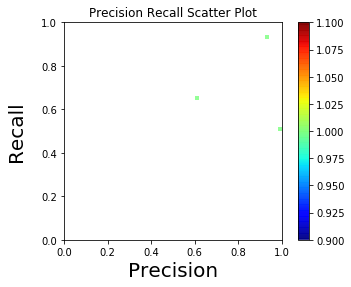

In [29]:
nf.plot()